## Importing the necessary libraries

In [178]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit

In [179]:
pd.set_option('display.max_columns', None)

In [180]:
os.chdir('D:\\Machine Learning Implementations')

## Getting data

In [181]:
data = pd.read_csv('CancerDetection.csv')

In [182]:
df = data.copy()

## Data Exploration

In [183]:
df.shape

(569, 32)

In [184]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [185]:
df.duplicated().sum()

0

*The data has no duplicate records.*

In [186]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

*The data does not contain null values.*

*Dropping Id column since it contains all unique records and isn't useful for our analysis.*

In [187]:
df.drop('id', axis = 1, inplace = True)

In [188]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


*Label encoding the target column - Diagnosis to understand correlation with other columns.*

In [189]:
labelencoder_Y = LabelEncoder()
df.diagnosis = labelencoder_Y.fit_transform(df.diagnosis)

In [190]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


*M or malignant tumour has been encoded to 1.
B or benign tumour has been encoded to 0.*

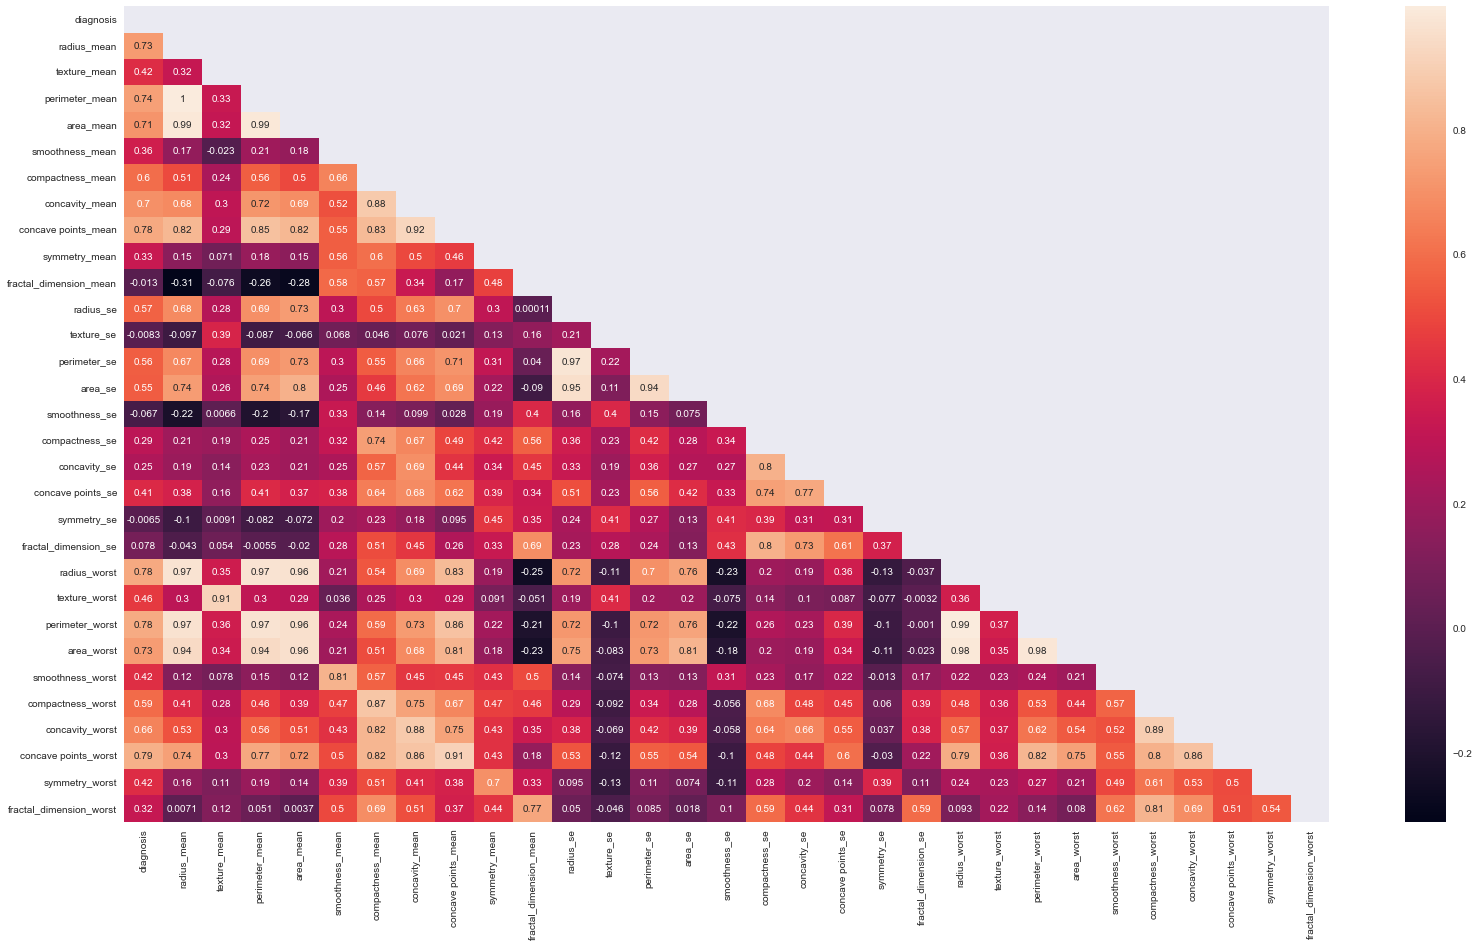

In [191]:
corr = df.corr()
mat = np.triu(corr)
fig, ax = plt.subplots(figsize=(27, 15))
sns.heatmap(corr, annot=True, mask = mat)
plt.show()

*Removing columns which have low correlation with the target variable*

In [192]:
df.drop(['texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'radius_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'texture_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'], axis = 1, inplace = True)

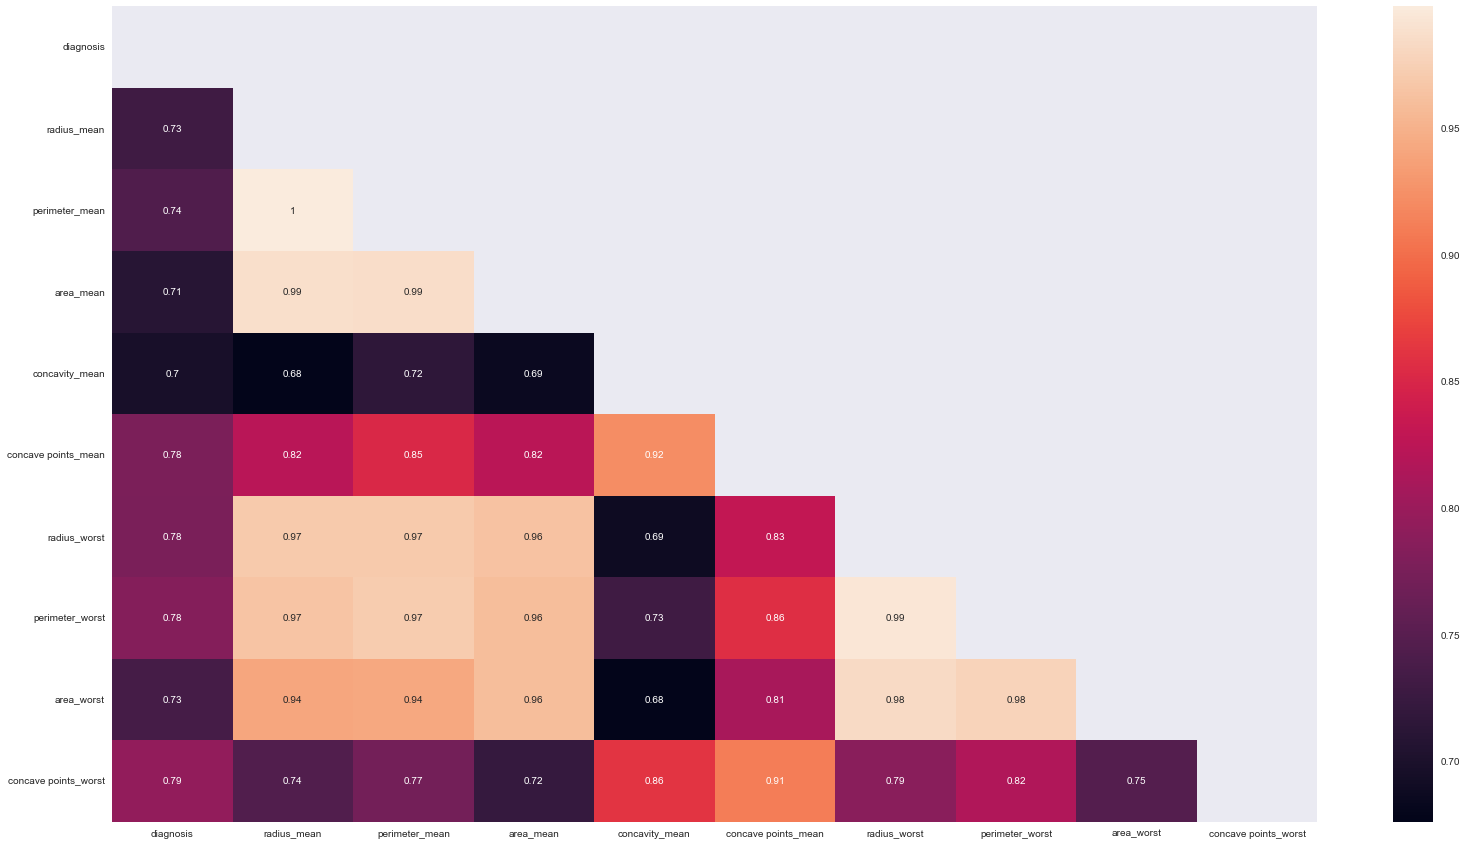

In [193]:
corr = df.corr()
mat = np.triu(corr)
fig, ax = plt.subplots(figsize=(27, 15))
sns.heatmap(corr, annot=True, mask = mat)
plt.show()

In [194]:
df.columns

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concave points_worst'],
      dtype='object')

*Splitting on the basis of target column for further analysis, and outlier removal*

In [195]:
dfm = df[df['diagnosis'] == 1]
dfb = df[df['diagnosis'] == 0]

In [196]:
print(dfm.shape)
print(dfb.shape)

(212, 10)
(357, 10)


In [197]:
dfm.describe()

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
count,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,1.0,17.462830,115.365377,978.376415,0.160775,0.087990,21.134811,141.370330,1422.286321,0.182237
std,0.0,3.203971,21.854653,367.937978,0.075019,0.034374,4.283569,29.457055,597.967743,0.046308
min,1.0,10.950000,71.900000,361.600000,0.023980,0.020310,12.840000,85.100000,508.100000,0.028990
25%,1.0,15.075000,98.745000,705.300000,0.109525,0.064620,17.730000,119.325000,970.300000,0.152750
50%,1.0,17.325000,114.200000,932.000000,0.151350,0.086280,20.590000,138.000000,1303.000000,0.182000
75%,1.0,19.590000,129.925000,1203.750000,0.203050,0.103175,23.807500,159.800000,1712.750000,0.210675
max,1.0,28.110000,188.500000,2501.000000,0.426800,0.201200,36.040000,251.200000,4254.000000,0.291000


In [198]:
dfm_num = dfm.drop('diagnosis', axis = 1)

array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>],
       [<AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'radius_worst'}>],
       [<AxesSubplot:title={'center':'perimeter_worst'}>,
        <AxesSubplot:title={'center':'area_worst'}>,
        <AxesSubplot:title={'center':'concave points_worst'}>]],
      dtype=object)

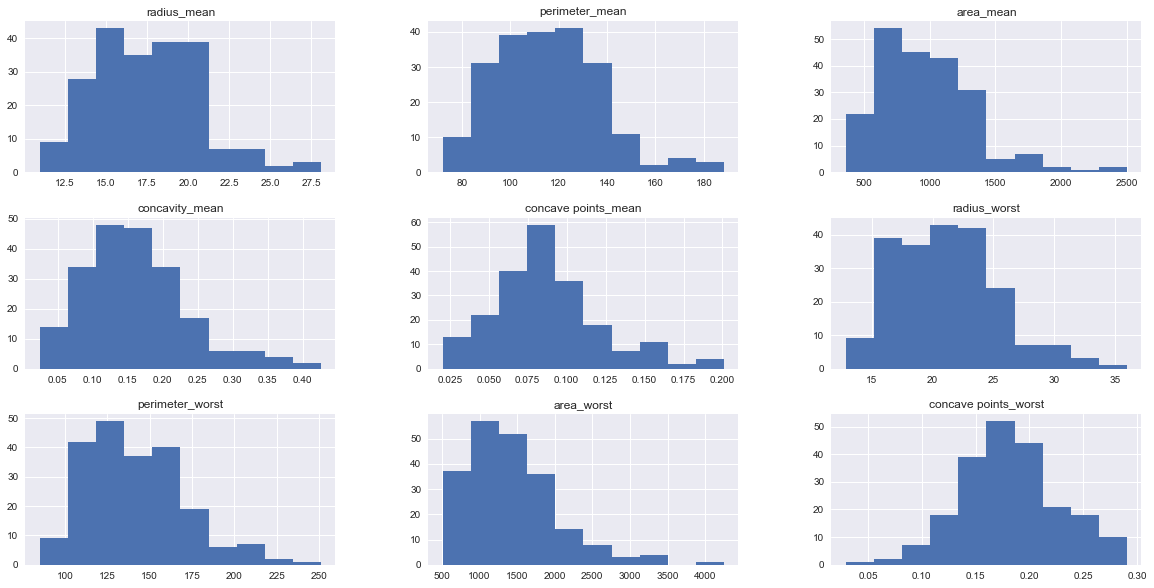

In [199]:
dfm_num.hist(figsize = (20, 10))

In [200]:
dfm[dfm['radius_worst'] >= 33]

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
180,1,27.22,182.1,2250.0,0.2871,0.1878,33.12,220.8,3216.0,0.2688
352,1,25.73,174.2,2010.0,0.3368,0.1913,33.13,229.3,3234.0,0.2756
461,1,27.42,186.9,2501.0,0.3635,0.1689,36.04,251.2,4254.0,0.2625


In [201]:
dfm[dfm['perimeter_worst'] >= 225]

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
352,1,25.73,174.2,2010.0,0.3368,0.1913,33.13,229.3,3234.0,0.2756
461,1,27.42,186.9,2501.0,0.3635,0.1689,36.04,251.2,4254.0,0.2625


In [202]:
dfm = dfm[dfm['perimeter_worst'] < 225]

In [203]:
dfm[dfm['area_worst'] >= 3500]

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst


In [204]:
dfm = dfm[dfm['area_worst'] < 3500]

In [205]:
dfm[dfm['concave points_worst'] < 0.05]

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
38,1,14.99,95.54,698.8,0.02398,0.02899,14.99,95.54,698.8,0.02899


In [206]:
dfm = dfm[dfm['concave points_worst'] >= 0.05]

In [207]:
dfb.describe()

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
count,357.0,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,0.0,12.146524,78.075406,462.790196,0.046058,0.025717,13.379801,87.005938,558.899440,0.074444
std,0.0,1.780512,11.807438,134.287118,0.043442,0.015909,1.981368,13.527091,163.601424,0.035797
min,0.0,6.981000,43.790000,143.500000,0.000000,0.000000,7.930000,50.410000,185.200000,0.000000
25%,0.0,11.080000,70.870000,378.200000,0.020310,0.015020,12.080000,78.270000,447.100000,0.051040
50%,0.0,12.200000,78.180000,458.400000,0.037090,0.023440,13.350000,86.920000,547.400000,0.074310
75%,0.0,13.370000,86.100000,551.100000,0.059990,0.032510,14.800000,96.590000,670.000000,0.097490
max,0.0,17.850000,114.600000,992.100000,0.410800,0.085340,19.820000,127.100000,1210.000000,0.175000


In [208]:
dfb_num = dfb.drop('diagnosis', axis = 1)

array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>],
       [<AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'radius_worst'}>],
       [<AxesSubplot:title={'center':'perimeter_worst'}>,
        <AxesSubplot:title={'center':'area_worst'}>,
        <AxesSubplot:title={'center':'concave points_worst'}>]],
      dtype=object)

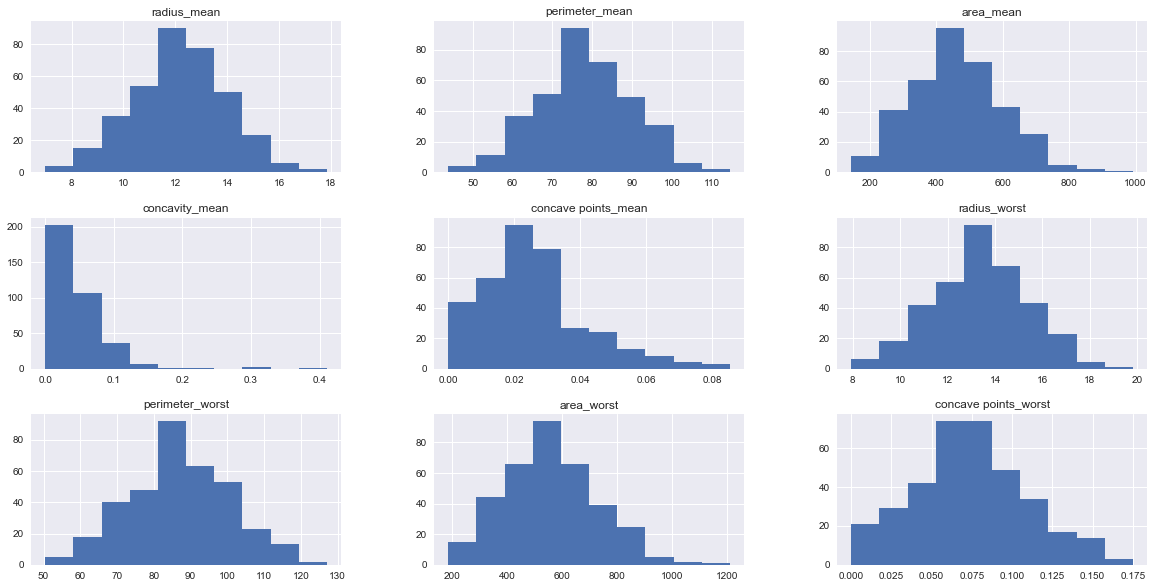

In [209]:
dfb_num.hist(figsize = (20, 10))

In [210]:
dfb[dfb['radius_mean'] >= 17]

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
491,0,17.85,114.6,992.1,0.04445,0.04178,19.82,127.1,1210.0,0.08341


In [211]:
dfb = dfb[dfb['radius_mean'] < 17]

In [212]:
dfb[dfb['perimeter_mean'] >= 107]

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
157,0,16.84,108.4,880.2,0.0515,0.02771,18.22,120.3,1032.0,0.08436


In [213]:
dfb = dfb[dfb['perimeter_mean'] < 107]

In [214]:
dfb[dfb['area_mean'] >= 800]

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
363,0,16.50,106.6,838.1,0.05862,0.04835,18.13,117.2,1009.0,0.09123
406,0,16.14,104.3,800.0,0.05500,0.04528,17.71,115.9,947.9,0.11290
508,0,16.30,104.7,819.8,0.05526,0.04563,17.32,109.8,928.2,0.13570


In [215]:
dfb = dfb[dfb['area_mean'] < 900]

In [216]:
dfb[dfb['concavity_mean'] >= 0.2]

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
68,0,9.029,58.79,250.5,0.3130,0.04375,10.31,65.50,324.7,0.1750
112,0,14.260,97.83,629.9,0.3003,0.07798,15.30,107.00,709.0,0.1505
152,0,9.731,63.78,300.2,0.4108,0.07857,11.02,71.04,380.5,0.1571
376,0,10.570,70.15,338.3,0.2280,0.05941,10.85,76.51,351.9,0.1465


In [217]:
dfb = dfb[dfb['concavity_mean'] < 0.2]

In [218]:
dfb[dfb['radius_worst'] >= 18]

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
363,0,16.5,106.6,838.1,0.05862,0.04835,18.13,117.2,1009.0,0.09123


In [219]:
dfb = dfb[dfb['radius_worst'] < 18]

In [220]:
dfb[dfb['perimeter_worst'] >= 120]

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst


In [221]:
dfb = dfb[dfb['perimeter_worst'] < 120]

In [222]:
dfb[dfb['area_worst'] >= 1000]

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst


In [223]:
dfb = dfb[dfb['area_worst'] < 1000]

In [224]:
df = pd.concat([dfm, dfb], axis = 0)

In [225]:
df.shape

(559, 10)

## Applying & Evaluating the model

In [226]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [227]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [228]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'SVM' : {
            'model': SVC(),
            'params': {
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'knn' : {
            'model' : KNeighborsClassifier(),
            'params' : {
                'n_neighbors' : [6]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 3, test_size = 0.2, random_state = 10)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(xtrain, ytrain)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(xtest, ytest)

,model,best_score,best_params
0,SVM,0.914815,{}
1,lasso,0.566991,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.712233,"{'criterion': 'squared_error', 'splitter': 'ra..."
3,knn,0.948148,{'n_neighbors': 6}


*knn gives the highest model accuracy.*

In [230]:
model = KNeighborsClassifier(n_neighbors = 5)

In [232]:
model.fit(xtrain, ytrain)

KNeighborsClassifier()

In [240]:
xtest.iloc[:, 0]

197    18.080
60     10.170
103     9.876
494    13.160
119    17.950
        ...  
318     9.042
498    18.490
20     13.080
123    14.500
526    13.460
Name: radius_mean, Length: 112, dtype: float64

In [233]:
y_pred = model.predict(xtest)